dataset- 44k images(kaggle) related to the fashion products
we are using a pre-trained CNN model which is already trained on huge data set, we just import the model and config it according to our requirement.
we are using ResNet-50 CNN model this model got trained on image net data set with more than millions of images
The resnet 50 can classify images into thousand different objects, and it can extract the features from the image(i.e objects inside the image), it can extract 2400 objects from a single image.

so, in our project we similarly extract the features from each image in the dataset, and then identify the similar features images based on the input image features.
the features will be feeded to nearest neighbors algorithm, based upon the features of 44k images distance will be calculated, to identify the similar product images we will be identifying the nearest image features based on the eidan distance, this is how the fashion recommendation model is going to built on CNN model and deploy as a web application 

In [13]:
#Importing Libraries

numpy - 
pickle - to save the models

In [14]:
import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D

from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm

#Extract Filenames from Folder
filenames - array of all the image file name(entire location)
ex. 'images\\10005.jpg'

In [15]:
filenames = []
for file in os.listdir('images'):
    filenames.append(os.path.join('images',file))
    

In [16]:
len(filenames)
filenames[5]

'images\\11157.jpg'

#Importing ResNet50 Model and Cofiguration.
weights = imagenet - The ResNet-50 is trained on imagenet data set 
include_top=False - excluding the top layer of ResNet50 , we will be replacing it with our own layer.
input_shape=(224,224,3) - height, width of the image & 3 implies the color(RGB)
the model accepts numpy array 

model.trainable = False - beacuse we are simply using the already trained model

In [17]:
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
model.trainable = False
# the top layer - to accept 2d array
model = tf.keras.models.Sequential([model,
                                   GlobalMaxPool2D()
                                   ])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d_1          │ (None, 2048)           │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

#Extracting Fetaures from Image

In [18]:
img = image.load_img('8852.jpg', target_size=(224,224))
img_array = image.img_to_array(img) #converting the img into array
img_expand_dim = np.expand_dims(img_array, axis=0) #3d array to 4d array
img_preprocess = preprocess_input(img_expand_dim) #RGB to BRG 
result = model.predict(img_preprocess).flatten() # feature extraction
norm_result = result/norm(result)
norm_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


array([0.01068562, 0.02334656, 0.01147304, ..., 0.00236327, 0.01932811,
       0.02570377], dtype=float32)

In [19]:
def extract_features_from_images(image_path, model):
    img = image.load_img(image_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    img_preprocess = preprocess_input(img_expand_dim)
    result = model.predict(img_preprocess).flatten()
    norm_result = result/norm(result)
    return norm_result

In [20]:
extract_features_from_images(filenames[0], model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


array([0.        , 0.02987779, 0.01090513, ..., 0.        , 0.00727855,
       0.01605097], dtype=float32)

In [21]:
image_features = []
for file in filenames:
    image_features.append(extract_features_from_images(file, model))
image_features

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

[array([0.        , 0.02987779, 0.01090513, ..., 0.        , 0.00727855,
        0.01605097], dtype=float32),
 array([0.        , 0.02379632, 0.00061573, ..., 0.        , 0.01353859,
        0.01609405], dtype=float32),
 array([0.00302331, 0.01935214, 0.00037897, ..., 0.        , 0.03349728,
        0.01362018], dtype=float32),
 array([0.        , 0.00651296, 0.01086532, ..., 0.        , 0.00190819,
        0.00254074], dtype=float32),
 array([0.00890286, 0.02897978, 0.00926227, ..., 0.00298901, 0.02362044,
        0.0074232 ], dtype=float32),
 array([0.        , 0.02205114, 0.        , ..., 0.        , 0.0106852 ,
        0.01738822], dtype=float32),
 array([0.00371639, 0.03027755, 0.0040463 , ..., 0.        , 0.        ,
        0.02305364], dtype=float32),
 array([0.0055463 , 0.03801173, 0.        , ..., 0.0022276 , 0.03026518,
        0.03849157], dtype=float32),
 array([0.00659018, 0.03179044, 0.00093824, ..., 0.00506388, 0.03771403,
        0.03701031], dtype=float32),
 array([0.

In [22]:
Image_features = pkl.dump(image_features, open('Images_features.pkl','wb'))

In [23]:
filenames = pkl.dump(filenames, open('filenames.pkl','wb'))

In [24]:
#Loading Pickle Files

In [25]:
Image_features = pkl.load(open('Images_features.pkl','rb'))

In [26]:
filenames = pkl.load(open('filenames.pkl','rb'))

In [27]:
np.array(Image_features).shape

(268, 2048)

In [28]:
#Finidng Simialar Images

In [29]:
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')

In [30]:
neighbors.fit(Image_features)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [31]:
input_image = extract_features_from_images('8852.jpg',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


In [32]:
distance,indices = neighbors.kneighbors([input_image])

In [33]:
indices[0]

array([167, 171, 168, 169, 170, 166], dtype=int64)

In [34]:
from IPython.display import Image

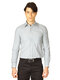

In [35]:
Image('8852.jpg')

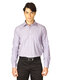

In [36]:
Image(filenames[indices[0][1]])

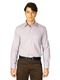

In [37]:
Image(filenames[indices[0][2]])

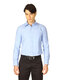

In [38]:
Image(filenames[indices[0][3]])

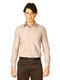

In [39]:
Image(filenames[indices[0][4]])

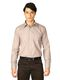

In [40]:
Image(filenames[indices[0][5]])